In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

Read the csv

In [2]:
data = pd.read_csv("D:\Desktop\Google Proyect\DATA\OUT\data_sin_outliers.csv", delimiter=',',index_col=False)


The Linear Regression Model begins to be created.

In [3]:

X_cols = ['MntMeatProducts', 'MntWines', "Income", "NumStorePurchases"]
y_col = 'NumCatalogPurchases'

X = data[X_cols].values
y = data[y_col].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc_x = StandardScaler().fit(X_train)
X_train_scaled = sc_x.transform(X_train)
X_test_scaled = sc_x.transform(X_test)

# Initialize the Linear Regression model
slr = LinearRegression()

# Train the model
slr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = slr.predict(X_test_scaled)

# Calculate and print the metrics
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Shape pred:", y_pred.shape)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R-squared:", r2)


Shape pred: (441,)
Mean Squared Error: 2.485255914743319
Root Mean Squared Error: 1.5764694461813458
R-squared: 0.660943134364814


This Python code creates a scatter plot comparing actual values (red dots) with predictions (blue dots). The plot shows how well the predictions match the real data. Tight clusters of blue dots around the red line indicate good performance, while scattered blue dots suggest room for improvement.

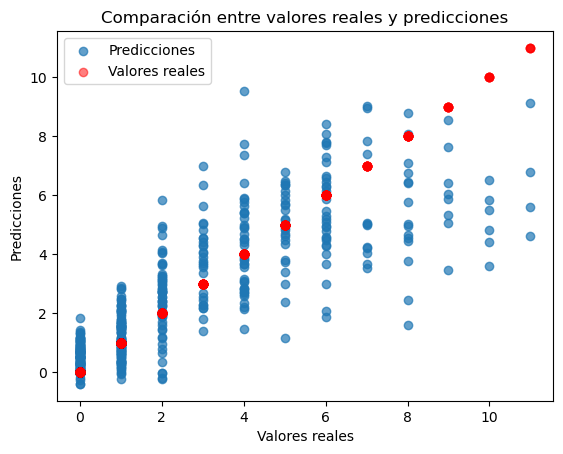

In [4]:
import matplotlib.pyplot as plt

# Scatter plot con colores diferentes para valores reales y predicciones
plt.scatter(y_test, y_pred, label='Predicciones', alpha=0.7)
plt.scatter(y_test, y_test, color='red', label='Valores reales', alpha=0.5)  # Puntos rojos para valores reales
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()  # Muestra la leyenda
plt.show()


Code saves trained linear regression model named slr as _best_Linear_Regression.pkl

In [5]:
import joblib

joblib.dump(slr, 'D:\Desktop\Google Proyect\MODELS\EXPORTED MODELS\_best_Linear_Regression.pkl')

['D:\\Desktop\\Google Proyect\\MODELS\\EXPORTED MODELS\\_best_Linear_Regression.pkl']